In [2]:
import numpy as np 
import random
import f
import matplotlib.pyplot as plt
hbar=1
def s(A,i):
    s=np.kron(np.eye(2**i),np.kron(A,np.eye(2**(L-1-i))))
    return(s)

X =np.array([[0,1],[1,0]],dtype=complex)/2
Y =np.array([[0,-1.j],[1.j,0]],dtype=complex)/2
Z =np.array([[1,0],[0,-1]],dtype=complex)/2
I=np.identity(2, dtype = complex)
L=int(input('no. of particles:'))
n=2**L

a=np.zeros((n,n))
b=np.zeros((n,n))
c=np.zeros((n,n))
d=np.zeros((n,n))
for i in range(L-1):
    a=a+np.dot(s(X,i),s(X,i+1))
    b=b+np.dot(s(Y,i),s(Y,i+1))
    c=c+np.dot(s(Z,i),s(Z,i+1))
   
              
                
for i in range(L):
    h=random.random()
    d=d+s(Z,i)  
         
Ham_open=a+b+c+d

print('Hamiltonian(open):',Ham_open)

              

no. of particles:3
Hamiltonian(open): [[ 2. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0.5+0.j  0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0.5+0.j  0. +0.j  0. +0.j  0.5+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j  0.5+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0.5+0.j  0. +0.j  0.5+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0.5+0.j  0. +0.j -1. +0.j  0.5+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j -0.5+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j -1. +0.j]]


In [3]:
Zero=np.array([[1],[0]])
One=np.array([[0],[1]])

In [4]:
S_i=np.array([1])
for l in range(L):
    if l%2==0:
        S_i=np.kron(S_i,Zero)
    else:
        S_i=np.kron(S_i,One)
hS_i=np.conj(S_i).T    
print('Initial State:\n',S_i)

Initial State:
 [[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [5]:
v,P=np.linalg.eigh(Ham_open)
Pinv=np.linalg.inv(P)
S_t=list()
Mz_1=list()
time=np.arange(1,10,0.1)
for t in time:
    D=np.diag(np.exp((((-v)*t)/hbar)*1.j))  
    U=np.dot(P,np.dot(D,Pinv))
    s_t=np.dot(U,S_i)
    hs_t=np.conj(s_t).T
    S_t.append(s_t)
    mz1=np.dot(hs_t,np.dot(s(Z,0),s_t))
  
    Mz_1.append(mz1[0])
    D=np.diag(v)
    


In [6]:
import quimb as qu
L=int(input('Enter No. of Particles:'))
H = qu.ham_heis(L,sparse=True,cyclic=False)
print('Hamiltonian:\n',H)
u=qu.up(sparse=True)
d=qu.down(sparse=True)    
r=np.array([1])
S_i=qu.qu(r,qtype='ket',sparse=True)
for l in range(L):
    if l%2==0:
        S_i=qu.kron(S_i,u)
    else:
        S_i=qu.kron(S_i,d)
  
print('Initial State:\n',S_i)
GS=qu.qu(qu.groundstate(H),sparse=True)
Sz0=qu.ikron(qu.spin_operator('z'),[2]*L , inds=[0])
el=list()
evo=qu.Evolution(S_i,H)
for pt in evo.at_times(np.arange(0,10,0.1)):
    e=qu.expec(pt,Sz0)
    el.append(e)

Enter No. of Particles:3
Hamiltonian:
   (0, 0)	0.5
  (1, 2)	0.5
  (2, 1)	0.5
  (2, 2)	-0.5
  (2, 4)	0.5
  (3, 5)	0.5
  (4, 2)	0.5
  (5, 3)	0.5
  (5, 5)	-0.5
  (5, 6)	0.5
  (6, 5)	0.5
  (7, 7)	0.5
Initial State:
   (2, 0)	(1+0j)


C:\Users\Kartikeya Arora\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


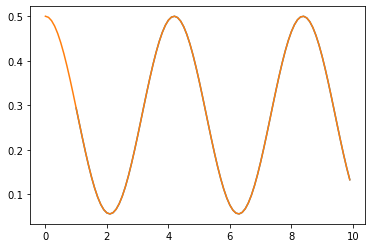

In [7]:
plt.plot(time,Mz_1)
plt.plot(np.arange(0,10,0.1),el)